# Exact solution of distance in hollow square

Is it possible to represent exactly the distance field from any source point in a square with a cut in the middle? The answer is yes, analytically, but there is a lot of geometry involved.

Not sure how useful is this, apart from checking convergence rate of the eikonal solver.

In [1]:
import numpy as np
import skfmm

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [124]:
N = 200
x = np.linspace(0,1,N+1)
y = np.linspace(0,1,N+1)
X,Y = np.meshgrid(x,y)
phi = np.ones_like(X)
mask = np.logical_and(np.abs(X-0.5)<0.05,np.abs(Y-0.5)<0.2)
phi = np.ma.MaskedArray(phi, mask)
phi[N//2,0] = 0.0
D = skfmm.distance(phi, dx=1/N)

In [125]:
def line_through_points(p1,p2,bbox=[0,1,0,1]):
    xmin,xmax,ymin,ymax = bbox
    x1,y1 = p1
    x2,y2 = p2
    if np.isclose(x1,x2):
        # vertical line
        y2 = ymax if y2 > y1 else ymin
    elif np.isclose(y1,y2):
        # horizontal line
        x2 = xmax if x2 > x1 else xmin
    else:
        # oblique
        tr = (1-x1)/(x2-x1)
        yr = y1 + tr*(y2-y1)
        tl = (-x1)/(x2-x1)
        yl = y1 + tl*(y2-y1)
        tt = (1-y1)/(y2-y1)
        xt = x1 + tt*(x2-x1)
        tb = (-y1)/(y2-y1)
        xb = x1 + tb*(x2-x1)
        if ymin <= yr <= ymax and tr > 0:
            x2,y2 = 1,yr
        elif ymin <= yl <= ymax and tl > 0:
            x2,y2 = 0,y_end
        elif xmin <= xt <= xmax and tt > 0:
            x2,y2 = xt,1
        elif xmin <= xb <= xmax and tb > 0:
            x2,y2 = xb,0
        else:
            print("voom")

    return x1,y1,x2,y2
    
def draw_line_through_points(p1,p2,bbox=[0,1,0,1]):
    x1,y1,x2,y2 = line_through_points(p1,p2,bbox)
    plt.plot(x1,y1,'ro')
    plt.plot(x2,y2,'ro')
    plt.plot([x1,x2],[y1,y2],'r-')

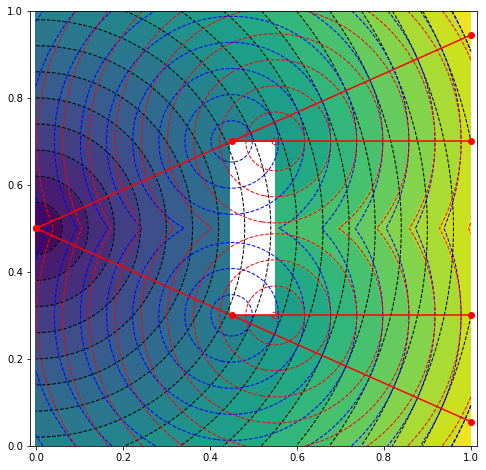

In [129]:
plt.figure(figsize=(8,8))
plt.axis('equal')
lvl = 20
cnt = plt.contourf(X,Y,D,lvl,corner_mask=False)
sol1 = np.sqrt(X**2 + (Y-0.5)**2)
sol2a = np.sqrt((X-0.45)**2 + (Y-0.3)**2) + np.sqrt(0.45**2 + (0.3-0.5)**2)
sol2b = np.sqrt((X-0.45)**2 + (Y-0.7)**2) + np.sqrt(0.45**2 + (0.7-0.5)**2)
sol2 = np.minimum(sol2a,sol2b)
sol4a = np.sqrt((X-0.55)**2 + (Y-0.7)**2) + np.sqrt(0.45**2 + (0.7-0.5)**2) + np.sqrt(0.1**2 + (0.7-0.7)**2)
sol4b = np.sqrt((X-0.55)**2 + (Y-0.3)**2) + np.sqrt(0.45**2 + (0.3-0.5)**2) + np.sqrt(0.1**2 + (0.3-0.3)**2)
sol4 = np.minimum(sol4a,sol4b)

def triarea(x1,y1,x2,y2,x3,y3):
    return abs((x1*(y2-y3) + x2*(y3-y1)+ x3*(y1-y2))/2.0)

#def mask_cone(p0,p1,p2):
#    x0,y0,x1,y1 = line_through_points(p0,p1)
#    _ ,_ ,x2,y2 = line_through_points(p0,p2)
#    a1 = triarea(x0,)
    
#mask2 = mask_cone([0.45,0.3],[0.55,0.3],[1.1*0.45,0.5+1.1*(0.3-0.5)])

x0 = [0,0.5]

draw_line_through_points(x0,[0.45,0.3])
draw_line_through_points(x0,[0.45,0.7])
draw_line_through_points([0.45,0.3],[0.55,0.3])
draw_line_through_points([0.45,0.7],[0.55,0.7])

plt.contour(X,Y,sol1,cnt.levels,colors='k',linestyles='--',linewidths=1.0)
plt.contour(X,Y,sol2,cnt.levels,colors='b',linestyles='--',linewidths=1.0)
#plt.contour(X,Y,sol3,cnt.levels,colors='b',linestyles='--',linewidths=1.0)
plt.contour(X,Y,sol4,cnt.levels,colors='r',linestyles='--',linewidths=1.0)
